## Load libraries

In [1]:
# tensorflow backend
from os import environ
environ['KERAS_BACKEND'] = 'tensorflow'
# vae stuff
from chemvae.vae_utils import VAEUtils
from chemvae import mol_utils as mu
# import scientific py
import numpy as np
import pandas as pd
# rdkit stuff
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import PandasTools
# plotting stuff
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import SVG, display
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Using TensorFlow backend.


# Load a model

In [2]:
vae = VAEUtils(directory='../models/zinc_properties')

From /home/sven/miniconda3/envs/chemvae/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:432: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

From /home/sven/miniconda3/envs/chemvae/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3535: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



From /home/sven/miniconda3/envs/chemvae/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:113: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

From /home/sven/miniconda3/envs/chemvae/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1210: calling reduce_prod_v1 (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
From /home/sven/miniconda3/envs/chemvae/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:2878: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
From /home/sven/miniconda3/envs/chemvae/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:154: The name tf.get_default_

Using standarized functions? True
Standarization: estimating mu and std values ...done!


# Using the VAE


## Decode/Encode 

Might not be perfect (it's probabilistic), try it several times.

smiles <i class="fa fa-arrow-right" aria-hidden="true"></i> x <i class="fa fa-arrow-right" aria-hidden="true"></i> z <i class="fa fa-arrow-right" aria-hidden="true"></i> x_r <i class="fa fa-arrow-right" aria-hidden="true"></i> smiles_r

In [3]:
smiles_1 = mu.canon_smiles('CSCC(=O)NNC(=O)c1c(C)oc(C)c1C')

X_1 = vae.smiles_to_hot(smiles_1,canonize_smiles=True)
z_1 = vae.encode(X_1)
X_r= vae.decode(z_1)

print('{:20s} : {}'.format('Input',smiles_1))
print('{:20s} : {}'.format('Reconstruction',vae.hot_to_smiles(X_r,strip=True)[0]))

print('{:20s} : {} with norm {:.3f}'.format('Z representation',z_1.shape, np.linalg.norm(z_1)))

Input                : CSCC(=O)NNC(=O)c1c(C)oc(C)c1C
Reconstruction       : CSC(C=O)NCC(=O)c1c(C)oc(C)c1C
Z representation     : (1, 196) with norm 10.684


## property preditor

In [6]:
print('Properties (qed,SAS,logP):')
y_1 = vae.predict_prop_Z(z_1)[0]
print(y_1)

Properties (qed,SAS,logP):


[0.77286774 2.4331768  0.955857  ]


## Decode several attempts
VAE are probabilistic

Searching molecules randomly sampled from 5.00 std (z-distance) from the point


RDKit ERROR: [11:28:40] non-ring atom 8 marked aromatic
RDKit ERROR: [11:28:40] SMILES Parse Error: syntax error while parsing: CS@@(=O)NCC(=O)c1c(C)oc(C)c1C
RDKit ERROR: [11:28:40] SMILES Parse Error: Failed parsing SMILES 'CS@@(=O)NCC(=O)c1c(C)oc(C)c1C' for input: 'CS@@(=O)NCC(=O)c1c(C)oc(C)c1C'
RDKit ERROR: [11:28:40] non-ring atom 8 marked aromatic
RDKit ERROR: [11:28:40] non-ring atom 8 marked aromatic
RDKit ERROR: [11:28:40] non-ring atom 7 marked aromatic


Found 10 unique mols, out of 75
SMILES
 0    CSCC(=O)NNC(=O)c1c(C)oc(C)c1C
1    CSC(C=O)NNC(=O)c1c(C)oc(C)c1C
2    CSCC(=O)NC(C=O)c1c(C)oc(C)c1C
3    CSCC(=O)NCC(=O)c1c(C)oc(C)c1C
4    COCC(=O)NCC(=O)c1c(C)oc(C)c1C
5    CSC(C=O)NCC(=O)c1c(C)oc(C)c1C
6    COC(C=O)NCC(=O)c1c(C)oc(C)c1C
7    CSC(C=O)NCC(=O)c1oc(C)c(C)c1C
8    ClCC(=O)NNC(=O)c1c(C)oc(C)c1C
9    ClC(C=O)NNC(=O)c1c(C)oc(C)c1C
Name: smiles, dtype: object


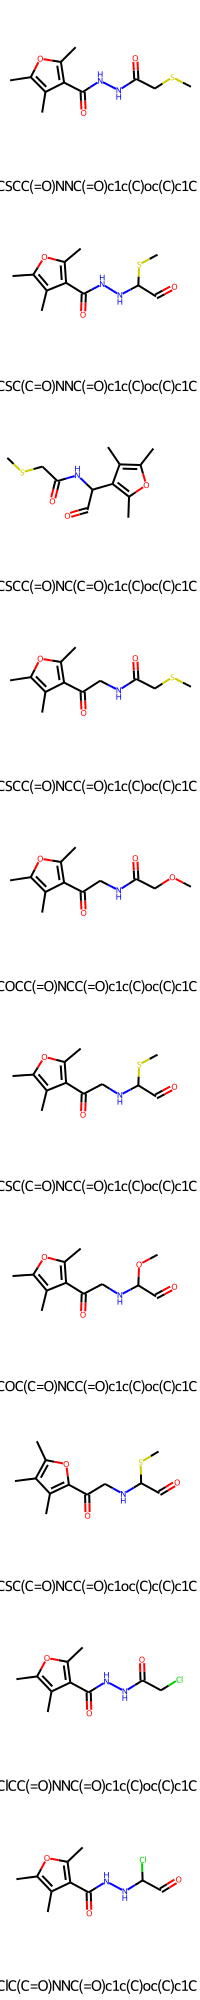

,smiles,distance,count,frequency,mol
0,CSCC(=O)NNC(=O)c1c(C)oc(C)c1C,0.000007,6,0.080000,"<img data-content=""rdkit/molecule"" src=""data:i..."
1,CSC(C=O)NNC(=O)c1c(C)oc(C)c1C,3.175912,2,0.026667,"<img data-content=""rdkit/molecule"" src=""data:i..."
2,CSCC(=O)NC(C=O)c1c(C)oc(C)c1C,3.527696,1,0.013333,"<img data-content=""rdkit/molecule"" src=""data:i..."
3,CSCC(=O)NCC(=O)c1c(C)oc(C)c1C,4.748194,35,0.466667,"<img data-content=""rdkit/molecule"" src=""data:i..."
4,COCC(=O)NCC(=O)c1c(C)oc(C)c1C,5.267823,6,0.080000,"<img data-content=""rdkit/molecule"" src=""data:i..."


In [4]:
noise=5.0
print('Searching molecules randomly sampled from {:.2f} std (z-distance) from the point'.format(noise))
df = vae.z_to_smiles( z_1,decode_attempts=100,noise_norm=noise)
print('Found {:d} unique mols, out of {:d}'.format(len(set(df['smiles'])),sum(df['count'])))
print('SMILES\n',df.smiles)
display(PandasTools.FrameToGridImage(df,column='mol', legendsCol='smiles',molsPerRow=1))
df.head()

## PCA of latent space

Sample random points from the training set along with properties

In [5]:
Z, data, smiles = vae.ls_sampler_w_prop(size=50000,return_smiles=True)
prop_opt = 'qed'
prop_df = pd.DataFrame(data).reset_index()
prop_df['smiles']=smiles
prop_df.head()

,index,logP,qed,SAS,smiles
0,13889,1.47532,0.828512,2.609982,COC[C@H](C)N1CCN(S(=O)(=O)c2ccc(C)cc2F)CC1
1,130749,0.56270,0.738364,1.879711,CNS(=O)(=O)Nc1ccccc1
2,7268,4.82510,0.451615,2.313575,COc1cccc(C(=O)N(Cc2ccccn2)c2nc3c(F)cc(F)cc3s2)c1
3,246391,2.02122,0.663799,3.700920,Cc1nc2ccc(NC(=O)C(=O)N3CC[C@H]([N+]4=CCCC4)C3)...
4,96889,3.51138,0.688129,2.824213,CCn1c(C(=O)N2CCN(Cc3ccccc3)[C@H](C#N)C2)cc2ccc...


Perform a PCA projection and color the points based on a property

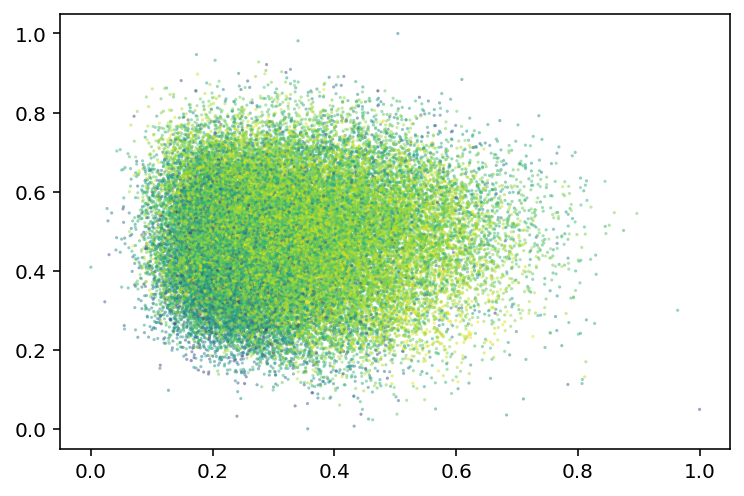

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# do pca and normalize
Z_pca = PCA(n_components=2).fit_transform(Z)
Z_pca = MinMaxScaler().fit_transform(Z_pca)

df = pd.DataFrame(np.transpose((Z_pca[:,0],Z_pca[:,1])))
df.columns = ['x','y']
df[prop_opt]=prop_df[prop_opt]

plt.scatter(x=df['x'], y=df['y'], c=df[prop_opt],
            cmap= 'viridis', marker='.',
            s=10,alpha=0.5, edgecolors='none')
plt.show()

compare with t-SNE, will take some time

In [8]:
from sklearn.manifold import TSNE

Z_tsne = TSNE(n_components=2).fit_transform(Z)
Z_tsne = MinMaxScaler().fit_transform(Z_tsne)

f = pd.DataFrame(np.transpose((Z_tsne[:,0],Z_tsne[:,1])))
df.columns = ['x','y']
df[prop_opt]=prop_df[prop_opt]

plt.scatter(x=df['x'], y=df['y'], c=df[prop_opt],
            cmap= 'viridis', marker='.',
            s=10,alpha=0.5, edgecolors='none')
plt.show()

KeyboardInterrupt: 